# Clustering Categorical Peoples Interests
Author: Morariu Tudor

## Citirea si Procesarea Datelor

### Pas 1: Importarea librariilor

In [175]:
import pandas as pd
import numpy as np

### Pas 2: Citirea dataset-ului

In [176]:
data = pd.read_csv("kaggle_Interests_group.csv");

### Pas 3: Analiza si Filtrarea datelor

Presupunem ca, daca intr-o celula este $NaN$ atunci persoana nu are interesul respectiv. Deci vom umple $NaN$ cu $0$

In [177]:
data.fillna(0, inplace=True);
data.info()

print(data["group"].unique());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6340 entries, 0 to 6339
Columns: 219 entries, group to interest217
dtypes: float64(217), int64(1), object(1)
memory usage: 10.6+ MB
['C' 'P' 'R' 'I']


Datele nu trebuie normalizate pentru ca toate sunt intre $0$ si $1$.

Coloana "group" trebuie transformata din $string$ in $int$

In [178]:
group_map = {
    'C': 0,
    'P': 1,
    'R': 2,
    'I': 3
}

data.drop(columns=['grand_tot_interests'], inplace=True);
data["group"] = data["group"].apply(lambda x: group_map[x]);
display(data);

,group,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6336,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6337,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6338,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


Plotam dataset-ul $2D$ folosing PCA

[[-2.46606462  0.5413139 ]
 [ 0.32316402 -0.7603406 ]
 [-1.16915156  1.26808106]
 ...
 [ 1.7088227  -0.19187668]
 [ 0.43946346 -1.60023434]
 [ 2.82338094 -2.25270654]]


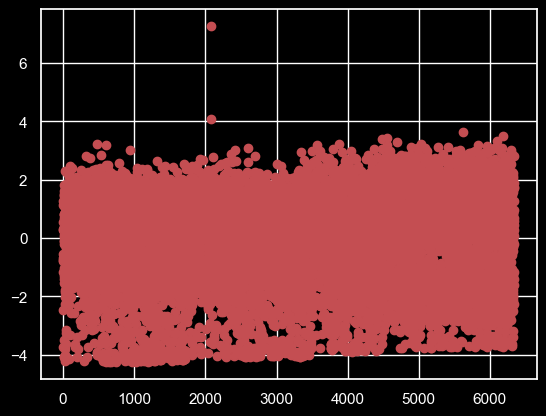

In [183]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Definim dark-mode pentru matplotlib pentru ca e cool
plt.style.use('dark_background')

pca2d = PCA(n_components = 2);
points_pca = pca2d.fit_transform(data);

print(points_pca);
f, ax = plt.subplots()

ax.plot(points_pca, 'ro');
plt.show();

### Pas 4: Test-Train Split

In [180]:
from sklearn.model_selection import train_test_split

features = data.drop(columns=['group']);
labels = data['group'];

train_f, test_f, train_l, test_l = train_test_split(features, labels, test_size = 0.2);

train_l = train_l.values;
test_l = test_l.values;

train_l = train_l.reshape(-1, 1);
test_l = test_l.reshape(-1, 1);

## Pregatirea si Selectia Modelului

### Pas 5: Selectia Modelului

Pentru model am putea folosi o clasificare cu MLP deoarece datele au label-uri sau folosind K-Means cu $4$ centroizi.

In [181]:
import keras
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [217]),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])


model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

epoci = 100;
History = model.fit(train_f, train_l, epochs=epoci, validation_data = (test_f, test_l), verbose=1)

Epoch 1/100


/Users/tudor/Documents/Work AI/.venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.3706 - sparse_categorical_accuracy: 0.2941 - val_loss: 1.3214 - val_sparse_categorical_accuracy: 0.4393
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3055 - sparse_categorical_accuracy: 0.4455 - val_loss: 1.2616 - val_sparse_categorical_accuracy: 0.4132
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2299 - sparse_categorical_accuracy: 0.4942 - val_loss: 1.1431 - val_sparse_categorical_accuracy: 0.5110
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0923 - sparse_categorical_accuracy: 0.5521 - val_loss: 1.0832 - val_sparse_categorical_accuracy: 0.5331
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0420 - sparse_categorical_accuracy: 0.5563 - val_loss: 1.0786 - val_sparse_categorical_accuracy: 0.5363
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0013 - sparse_categorical_accuracy: 0.5682 - val_loss: 1.0418 - val_sparse_categorical_accuracy: 0.5442
Epoch 7/10

{'loss': [1.354782223701477, 1.2891921997070312, 1.1910070180892944, 1.0919342041015625, 1.0324865579605103, 1.0003330707550049, 0.9832859039306641, 0.9695437550544739, 0.955809473991394, 0.9465672969818115, 0.9370949864387512, 0.9293866753578186, 0.9197052717208862, 0.9112556576728821, 0.9024306535720825, 0.8991246819496155, 0.892828643321991, 0.8875423669815063, 0.8810214996337891, 0.8695617318153381, 0.869213879108429, 0.8552815318107605, 0.853840172290802, 0.8447654843330383, 0.8398207426071167, 0.8310163021087646, 0.8239484429359436, 0.8167721033096313, 0.8082051873207092, 0.7993664145469666, 0.7900727987289429, 0.7803769111633301, 0.7773874402046204, 0.7639681100845337, 0.7565503120422363, 0.7452183961868286, 0.73077791929245, 0.7156580686569214, 0.7212216258049011, 0.6932752132415771, 0.6899498105049133, 0.6621833443641663, 0.6514420509338379, 0.6501217484474182, 0.6276541352272034, 0.6177892088890076, 0.6121739745140076, 0.5913393497467041, 0.5829348564147949, 0.560204029083252

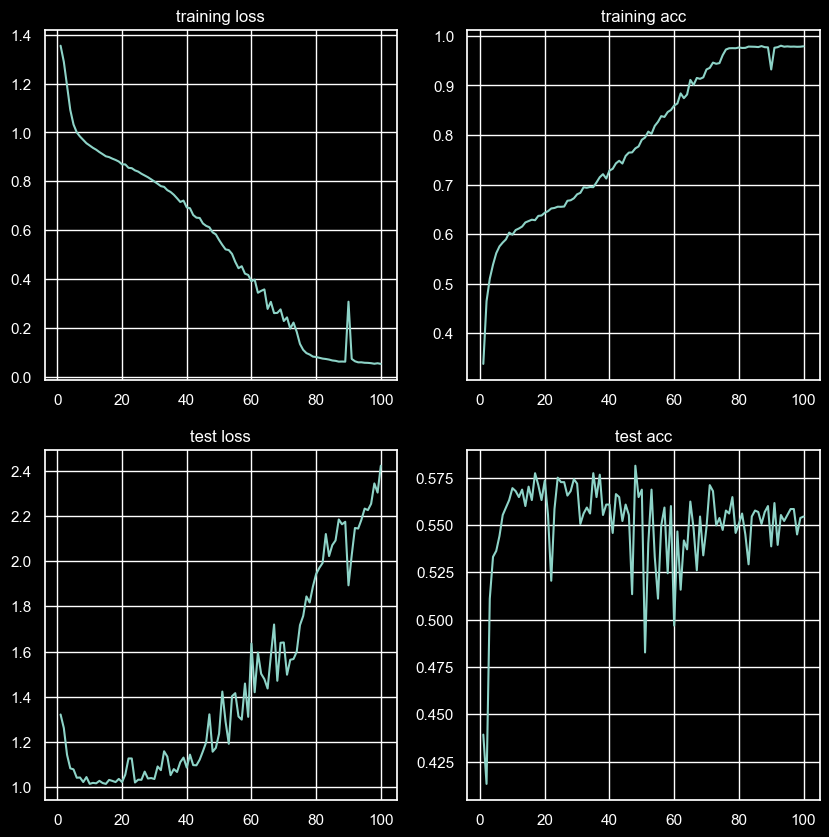

In [184]:
f, ax = plt.subplots(2, 2);
f.set_figwidth(10);
f.set_figheight(10);

print(History.history);

ax[0, 0].plot(np.arange(1, epoci + 1, 1), History.history['loss']);
ax[0, 0].set_title("training loss");

ax[0, 1].plot(np.arange(1, epoci + 1, 1), History.history['sparse_categorical_accuracy']);
ax[0, 1].set_title("training acc")

ax[1, 0].plot(np.arange(1, epoci + 1, 1), History.history['val_loss']);
ax[1, 0].set_title("test loss")

ax[1, 1].plot(np.arange(1, epoci + 1, 1), History.history['val_sparse_categorical_accuracy']);
ax[1, 1].set_title("test acc")



plt.show();